# Module 1, Lesson 2: Data Preprocessing and Feature Engineering

## Introduction

In this notebook, we will explore practical examples of data preprocessing and feature engineering techniques using Python libraries such as NumPy, Pandas, and Scikit-learn. We will cover the following topics:

1. Handling missing data
2. Data normalization and standardization
3. Dealing with categorical variables
4. Feature scaling
5. Feature selection
6. Dimensionality reduction

## Requirements

Before we start, make sure you have the following libraries installed:

- NumPy
- Pandas
- Scikit-learn

You can install them using the following command:

```
pip install numpy pandas scikit-learn
```

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Handling Missing Data

In [2]:
# Create a sample dataset with missing values
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, 7, 8],
    'C': [9, 10, 11, np.nan]
})

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

print("Original Data:")
print(data)
print("\nImputed Data:")
print(imputed_data)

Original Data:
     A    B     C
0  1.0  5.0   9.0
1  2.0  NaN  10.0
2  NaN  7.0  11.0
3  4.0  8.0   NaN

Imputed Data:
[[ 1.          5.          9.        ]
 [ 2.          6.66666667 10.        ]
 [ 2.33333333  7.         11.        ]
 [ 4.          8.         10.        ]]


## Data Normalization and Standardization

In [3]:
# Create a sample dataset
data = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40]
})

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Standardize the data using Z-score standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nNormalized Data:")
print(normalized_data)
print("\nStandardized Data:")
print(standardized_data)

Original Data:
   A   B
0  1  10
1  2  20
2  3  30
3  4  40

Normalized Data:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


## Dealing with Categorical Variables

In [4]:
# Create a sample dataset with categorical variables
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red'],
    'Size': ['Small', 'Medium', 'Large', 'Medium']
})

# Perform one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data).toarray()

# Perform label encoding
label_encoder = LabelEncoder()
data['Color_Encoded'] = label_encoder.fit_transform(data['Color'])
data['Size_Encoded'] = label_encoder.fit_transform(data['Size'])

print("Original Data:")
print(data)
print("\nOne-Hot Encoded Data:")
print(encoded_data)
print("\nLabel Encoded Data:")
print(data[['Color_Encoded', 'Size_Encoded']])

Original Data:
   Color    Size  Color_Encoded  Size_Encoded
0    Red   Small              2             2
1   Blue  Medium              0             1
2  Green   Large              1             0
3    Red  Medium              2             1

One-Hot Encoded Data:
[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]]

Label Encoded Data:
   Color_Encoded  Size_Encoded
0              2             2
1              0             1
2              1             0
3              2             1


## Feature Selection

In [6]:
from sklearn.linear_model import LogisticRegression
# Create a sample dataset
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
y = np.array([0, 1, 0, 1])

# Perform univariate feature selection
selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(X, y)

# Perform recursive feature elimination
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selected_features_rfe = selector.fit_transform(X, y)

print("Original Features:")
print(X)
print("\nSelected Features (Univariate):")
print(selected_features)
print("\nSelected Features (RFE):")
print(selected_features_rfe)

Original Features:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Selected Features (Univariate):
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]]

Selected Features (RFE):
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]]


## Dimensionality Reduction

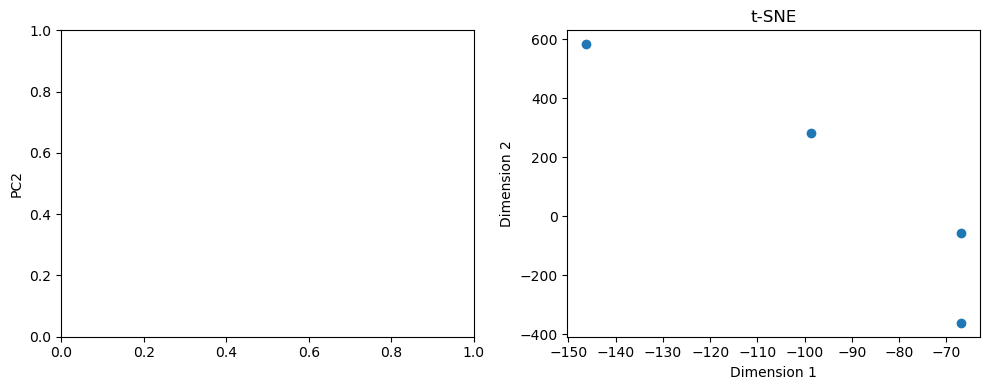

In [11]:
# Create a sample dataset
import matplotlib.pyplot as plt

# Create a sample dataset
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Perform PCA
# Perform t-SNE with reduced perplexity
tsne = TSNE(n_components=2, perplexity=2)  # Set perplexity to a lower value
tsne_result = tsne.fit_transform(X)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.set_ylabel('PC2')

ax2.scatter(tsne_result[:, 0], tsne_result[:, 1])
ax2.set_title('t-SNE')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we explored various data preprocessing and feature engineering techniques using Python libraries. We covered handling missing data, data normalization and standardization, dealing with categorical variables, feature scaling, feature selection, and dimensionality reduction.

These techniques are crucial for preparing data for machine learning models and improving their performance. By applying these techniques, we can ensure that our data is clean, structured, and relevant for the task at hand.

Feel free to experiment with different datasets and parameters to further solidify your understanding of these concepts.